# Energy Prediction

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')

In [58]:
df1 = pd.read_csv("../datsets/dataset2/HomeA-electrical/HomeA/2016/HomeA-meter2_2016.csv", delimiter = ',')
df1['Date & Time']= pd.to_datetime(df1['Date & Time'], format='%Y-%m-%d %H:%M:%S')
df1 = df1.set_index(df1['Date & Time'])
df1 = df1[~df1.index.duplicated(keep='first')]
df1.drop(df1.loc[df1['Date & Time'] > '2016-12-15 20:00:00'].index, inplace=True)
df1 = df1.drop(['Date & Time'], axis=1)
df1 = df1.drop(['use [kW]'], axis=1)
df1 = df1.drop(['gen [kW]'], axis=1)
df1 = df1.resample('H').mean()
df1.dropna()
df1



,FurnaceHRV [kW],CellarOutlets [kW],WashingMachine [kW],FridgeRange [kW],DisposalDishwasher [kW],KitchenLights [kW],BedroomOutlets [kW],BedroomLights [kW],MasterOutlets [kW],MasterLights [kW],DuctHeaterHRV [kW]
Date & Time,,,,,,,,,,,
2016-01-01 00:00:00,0.047014,0.071178,0.000065,0.001042,0.000044,0.000013,0.014293,0.004688,0.015792,0.014146,0.000023
2016-01-01 01:00:00,0.041323,0.068331,0.000074,0.001054,0.000027,0.000009,0.014347,0.004696,0.015877,0.014206,0.000019
2016-01-01 02:00:00,0.024982,0.065818,0.000026,0.001064,0.000017,0.000008,0.014428,0.004712,0.015973,0.014302,0.000017
2016-01-01 03:00:00,0.043156,0.064913,0.000055,0.001061,0.000029,0.000010,0.014437,0.004724,0.015969,0.014307,0.000020
2016-01-01 04:00:00,0.400128,0.069192,0.001070,0.000942,0.000214,0.000056,0.014370,0.004756,0.015844,0.014394,0.000089
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-15 16:00:00,0.105534,0.066047,0.000477,0.000972,0.000137,0.000015,0.007884,0.004662,0.004648,0.013894,0.000066
2016-12-15 17:00:00,0.072918,0.066398,0.000326,0.000976,0.000149,0.000013,0.008098,0.004681,0.005665,0.021145,0.000074
2016-12-15 18:00:00,0.156775,0.077362,0.000690,0.000910,0.000239,0.000020,0.008047,0.007108,0.005629,0.030427,0.000112


In [59]:
df2 = pd.read_csv("../datsets/dataset2/HomeA-electrical/HomeA/2016/HomeA-meter3_2016.csv", delimiter = ',')
df2['Date & Time']= pd.to_datetime(df2['Date & Time'], format='%Y-%m-%d %H:%M:%S')
df2 = df2.set_index(df2['Date & Time'])
df2 = df2[~df2.index.duplicated(keep='first')]
df2 = df2.drop(['Date & Time'], axis=1)
df2 = df2.drop(['use [kW]'], axis=1)
df2 = df2.drop(['gen [kW]'], axis=1)
df2 = df2.resample('H').mean()
df2.dropna()
df2


,ElectricRange [kW],Dryer [kW],GarageMudroomLights [kW],DiningRoomOutlets [kW],MudroomOutlets [kW],MasterBathOutlets [kW],GarageOutlets [kW],BasementOutdoorOutlets [kW]
Date & Time,,,,,,,,
2016-01-01 00:00:00,0.003892,0.003384,0.003685,0.002003,0.047259,0.004784,0.006014,0.000577
2016-01-01 01:00:00,0.003884,0.003408,0.003751,0.001896,0.002993,0.004865,0.006148,0.000586
2016-01-01 02:00:00,0.003925,0.003402,0.003782,0.001895,0.002986,0.004874,0.006172,0.000595
2016-01-01 03:00:00,0.003921,0.003398,0.003801,0.001881,0.002980,0.004871,0.006171,0.000595
2016-01-01 04:00:00,0.003911,0.003402,0.003765,0.001906,0.003000,0.004872,0.006166,0.000591
...,...,...,...,...,...,...,...,...
2016-12-15 16:00:00,0.003796,0.003432,0.004200,0.000049,0.002912,0.004825,0.006047,0.008066
2016-12-15 17:00:00,0.004096,0.003317,0.034314,0.000204,0.002929,0.004879,0.010116,0.008093
2016-12-15 18:00:00,0.004351,0.003160,0.062751,0.000480,0.002926,0.004928,0.006155,0.008042


In [60]:
df3 = pd.read_csv("../datsets/dataset2/HomeA-electrical/HomeA/2016/HomeA-meter4_2016.csv", delimiter = ',')
df3['Date & Time']= pd.to_datetime(df3['Date & Time'], format='%Y-%m-%d %H:%M:%S')
df3 = df3.set_index(df3['Date & Time'])
df3 = df3[~df3.index.duplicated(keep='first')]
df3.drop(df3.loc[df3['Date & Time'] > '2016-12-15 20:00:00'].index, inplace=True)
df3 = df3.drop(['Date & Time'], axis=1)
df3 = df3.drop(['use [kW]'], axis=1)
df3 = df3.drop(['gen [kW]'], axis=1)
df3 = df3.drop(['MasterOutlets [kW]'], axis=1)
df3 = df3.resample('H').mean()
df3.dropna()
df3

,KitchenDenLights [kW],MasterBedBathLights [kW],DenOutdoorLights [kW],DenOutlets [kW],RearBasementLights [kW],KitchenOutletsEast [kW],KitchenOutletsSouth [kW],DishwasherDisposalSinkLight [kW],Refrigerator [kW],Microwave [kW],OfficeLights [kW]
Date & Time,,,,,,,,,,,
2016-01-01 00:00:00,0.007617,0.008827,0.000479,0.002344,0.001920,0.003737,0.005727,0.002158,0.108923,0.004752,0.068949
2016-01-01 01:00:00,0.007612,0.004985,0.000499,0.002374,0.001927,0.003695,0.005746,0.002160,0.107577,0.004783,0.069007
2016-01-01 02:00:00,0.007634,0.005344,0.000502,0.002393,0.001940,0.003685,0.005795,0.002173,0.089925,0.004789,0.067991
2016-01-01 03:00:00,0.007634,0.004668,0.000500,0.002392,0.001940,0.003669,0.005806,0.002176,0.077471,0.004773,0.068406
2016-01-01 04:00:00,0.007625,0.004669,0.000500,0.002376,0.001934,0.003690,0.005807,0.002167,0.102946,0.004789,0.068051
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-15 16:00:00,0.016659,0.004558,0.000484,0.002339,0.001941,0.003477,0.003825,0.001777,0.028926,0.004503,0.051648
2016-12-15 17:00:00,0.071202,0.004718,0.000417,0.193368,0.002038,0.003817,0.112917,0.011371,0.029092,0.011313,0.108842
2016-12-15 18:00:00,0.119866,0.004685,0.000650,0.410753,0.002129,0.003894,0.149157,0.021315,0.119510,0.146183,0.128245


In [76]:
df = pd.concat([df1, df2, df3], axis=1)
df.loc[:,'use'] = df.sum(axis=1)

df = df.dropna()

#Retirar [kW]
df.columns = [col.replace(' [kW]', '') for col in df.columns]
df


,FurnaceHRV,CellarOutlets,WashingMachine,FridgeRange,DisposalDishwasher,KitchenLights,BedroomOutlets,BedroomLights,MasterOutlets,MasterLights,...,DenOutdoorLights,DenOutlets,RearBasementLights,KitchenOutletsEast,KitchenOutletsSouth,DishwasherDisposalSinkLight,Refrigerator,Microwave,OfficeLights,use
Date & Time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.047014,0.071178,0.000065,0.001042,0.000044,0.000013,0.014293,0.004688,0.015792,0.014146,...,0.000479,0.002344,0.001920,0.003737,0.005727,0.002158,0.108923,0.004752,0.068949,0.455330
2016-01-01 01:00:00,0.041323,0.068331,0.000074,0.001054,0.000027,0.000009,0.014347,0.004696,0.015877,0.014206,...,0.000499,0.002374,0.001927,0.003695,0.005746,0.002160,0.107577,0.004783,0.069007,0.397858
2016-01-01 02:00:00,0.024982,0.065818,0.000026,0.001064,0.000017,0.000008,0.014428,0.004712,0.015973,0.014302,...,0.000502,0.002393,0.001940,0.003685,0.005795,0.002173,0.089925,0.004789,0.067991,0.361147
2016-01-01 03:00:00,0.043156,0.064913,0.000055,0.001061,0.000029,0.000010,0.014437,0.004724,0.015969,0.014307,...,0.000500,0.002392,0.001940,0.003669,0.005806,0.002176,0.077471,0.004773,0.068406,0.365732
2016-01-01 04:00:00,0.400128,0.069192,0.001070,0.000942,0.000214,0.000056,0.014370,0.004756,0.015844,0.014394,...,0.000500,0.002376,0.001934,0.003690,0.005807,0.002167,0.102946,0.004789,0.068051,0.753222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-15 16:00:00,0.105534,0.066047,0.000477,0.000972,0.000137,0.000015,0.007884,0.004662,0.004648,0.013894,...,0.000484,0.002339,0.001941,0.003477,0.003825,0.001777,0.028926,0.004503,0.051648,0.357801
2016-12-15 17:00:00,0.072918,0.066398,0.000326,0.000976,0.000149,0.000013,0.008098,0.004681,0.005665,0.021145,...,0.000417,0.193368,0.002038,0.003817,0.112917,0.011371,0.029092,0.011313,0.108842,0.797484
2016-12-15 18:00:00,0.156775,0.077362,0.000690,0.000910,0.000239,0.000020,0.008047,0.007108,0.005629,0.030427,...,0.000650,0.410753,0.002129,0.003894,0.149157,0.021315,0.119510,0.146183,0.128245,1.486502


## Visualisations

<AxesSubplot:title={'center':'Energy use'}, xlabel='Date & Time'>

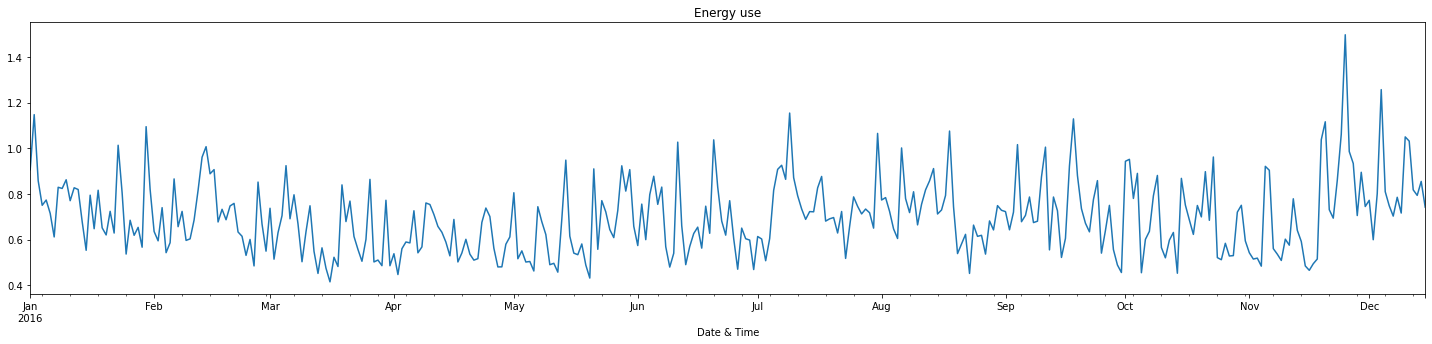

In [78]:
df['use'].resample(rule='D').mean().plot(figsize=(25,5), title="Energy use")    #group by day

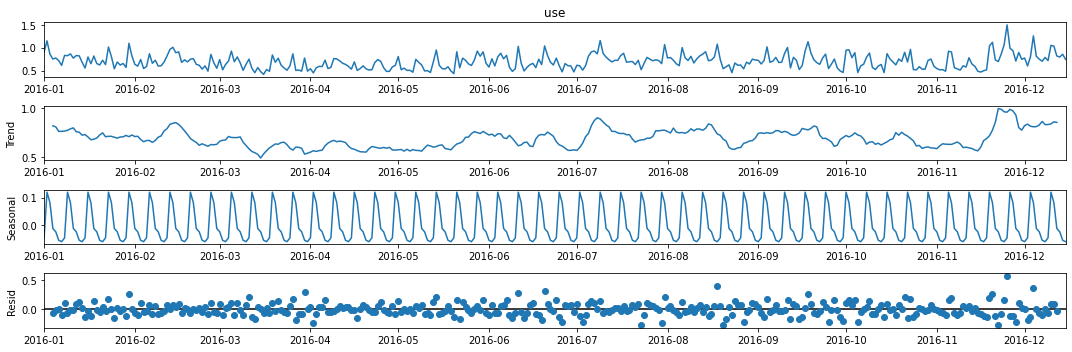

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rc("figure", figsize=(15,5))

results = seasonal_decompose(df['use'].resample(rule='D').mean())
fig = results.plot()


# Feature Selection

[18:36:29] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




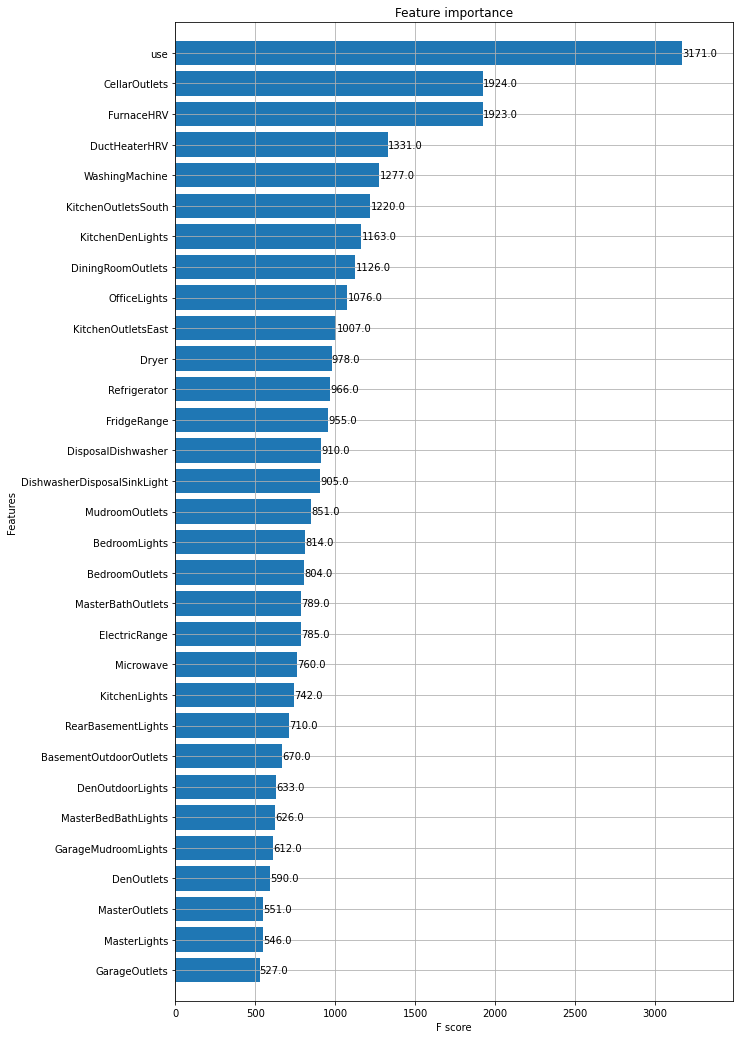

In [80]:
import xgboost as xgb

use = df["use"].values
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(df, use, feature_names=df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

importance = model.get_score(importance_type='weight')
tuples = sorted([(k, importance[k]) for k in importance], key=lambda x: x[1], reverse=True)
xgb_imp_f = [x[0] for x in tuples]

feature_selection = xgb_imp_f[:10]

# Help Functions

In [81]:
#Apply a scaler to the data

def scale(scaler, x_train, y_train, x_test, x_val=None, y_val=None):
    x_scaler = scaler()
    x_train = x_scaler.fit_transform(x_train)
    x_test = x_scaler.transform(x_test)
   
    y_scaler = scaler()
    y_train = y_scaler.fit_transform(y_train)
    
    if x_val is not None:
        x_val = x_scaler.transform(x_val)
        y_val = y_scaler.transform(y_val)
    
        return x_train, y_train, x_test, x_val, y_val,x_scaler, y_scaler

    return x_train, y_train, x_test, x_scaler, y_scaler
    


In [82]:
def predict_evaluate(model, x_test, y_scaler, y_test_UnScalled, graphName = 'Energy Usage Prediction', showplots=False):
    prediction = model.predict(x_test).reshape(-1, 1)
    prediction = y_scaler.inverse_transform(prediction)
    
    #equalTest = 7*24 - (24*30-len(prediction))
    #prediction = prediction[equalTest:]
    #y_test_UnScalled = y_test_UnScalled[equalTest:]
    

    diff = [abs(prediction[i]-y_test_UnScalled[i]) for i in range(len(prediction))]
    
    resultingPlot = plt.figure(figsize=(25,10))
    plt.plot(y_test_UnScalled, color='red', label='Original Usage')
    plt.plot(prediction, color='blue', label='Predicted Usage')
    plt.plot(diff, color='green', label='Error')
    plt.title(graphName)
    plt.ylabel('kW')
    plt.legend()
    
    mape = mean_absolute_percentage_error(y_test_UnScalled, prediction)
    mae = mean_absolute_error(y_test_UnScalled, prediction)
    maxae = max(diff)[0]
    mse = mean_squared_error(y_test_UnScalled, prediction)
    
    if showplots:
        plt.show()
        print("Mean Absolute Percentage Error: ", mape)
        print("Mean Absolute Error: ", mae)
        print("Max Absolute Error: ", maxae)
        print("Mean Squared Error: ", mse)
    
    return {"name":graphName, "resultingPlot": resultingPlot, "mape":mape, "mae":mae, "maxae":maxae, "mse":mse}

# LSTM

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, MaxPooling2D, Conv2D, TimeDistributed, Flatten
from keras.callbacks import EarlyStopping

def define_model(past_window, num_features):
    
    #OPTIMIZAVEL
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True,input_shape=(past_window, num_features)))
    model.add(LSTM(units=64))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_absolute_error')
    #model.summary()
    
    return model

def train(model, train_generator, val_generator, showplot=False):
    early_stopping = EarlyStopping(monitor="val_loss", 
                                   patience=5, 
                                   mode="min")
    
    history = model.fit(train_generator, 
                                  epochs=32,
                                  validation_data=val_generator, 
                                  shuffle = False, 
                                  callbacks=[early_stopping],
                                  verbose=0
                                   )
    
    loss_per_epoch = history.history['loss']
    
    if showplot:
        plt.plot(range(len(loss_per_epoch)), loss_per_epoch)


def make_lstm(df, featuresNames, targetName, past_window, name='Energy Usage Prediction', showplots=False):
    num_features = len(featuresNames)
    
    features = df[featuresNames]
    target = df[targetName]
    
    #DIVIDIR EM TREINO/TESTE
    x_train, x_test, y_train, y_test = train_test_split(features.values,target.values.reshape(-1, 1), test_size=24*30, shuffle=False)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05, shuffle=False)
   
    y_test_UnScalled = y_test[past_window:] #GUARDAR PARA COMPARAR RESULTADOS

    #SCALE
    x_train, y_train, x_test, x_val, y_val, x_scaler, y_scaler = scale(MinMaxScaler, x_train, y_train, x_test, x_val, y_val)
    
    
    batch_size=64
    train_generator = TimeseriesGenerator(x_train, y_train, length=past_window, batch_size=batch_size)
    val_generator = TimeseriesGenerator(x_val, y_val, length=past_window, batch_size=batch_size)
    test_generator = TimeseriesGenerator(x_test, y_test, length=past_window, batch_size=batch_size)

    model = define_model(past_window, num_features)
    train(model, train_generator, val_generator)

    return predict_evaluate(model, test_generator, y_scaler, y_test_UnScalled, graphName=name, showplots=showplots)


## Evaluate a bunch of LSTMs

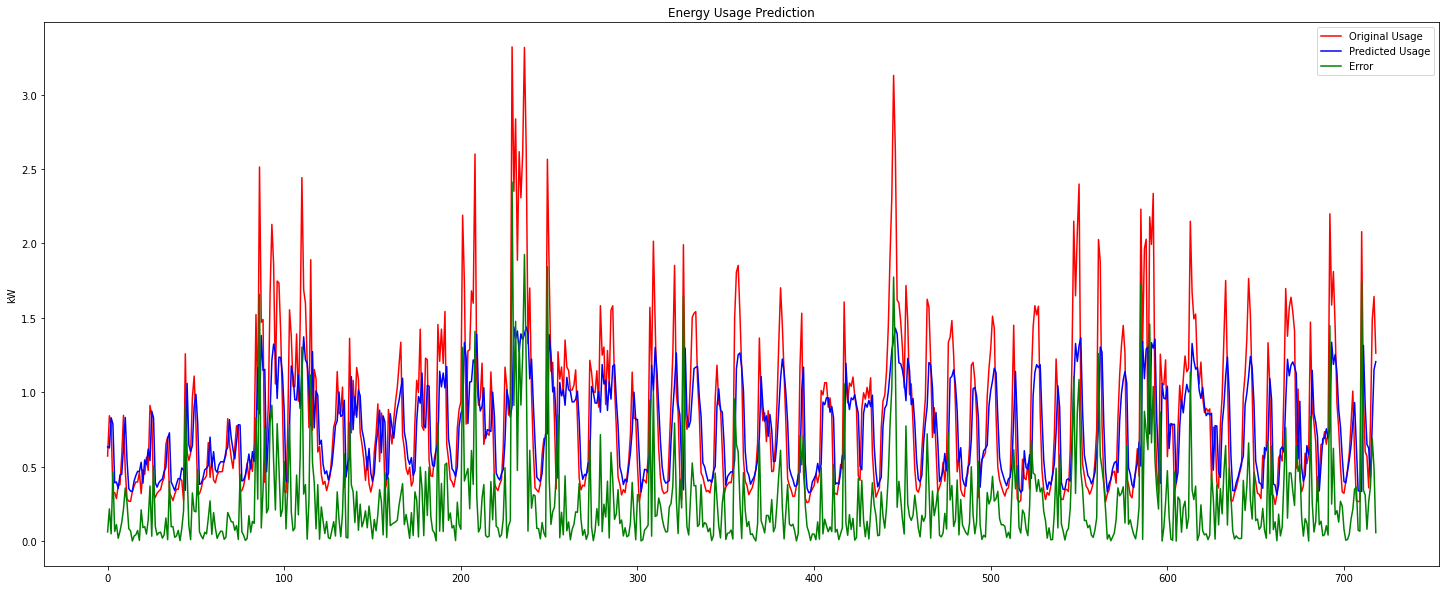

Mean Absolute Percentage Error:  0.3148240928225791
Mean Absolute Error:  0.259346308428078
Max Absolute Error:  2.41254397995475
Mean Squared Error:  0.1630947690350108


In [84]:
featurelist = ['use']
TARGET_NAME = 'use'
past_window = 1
result = make_lstm(df, featurelist, TARGET_NAME, past_window, showplots=True)  

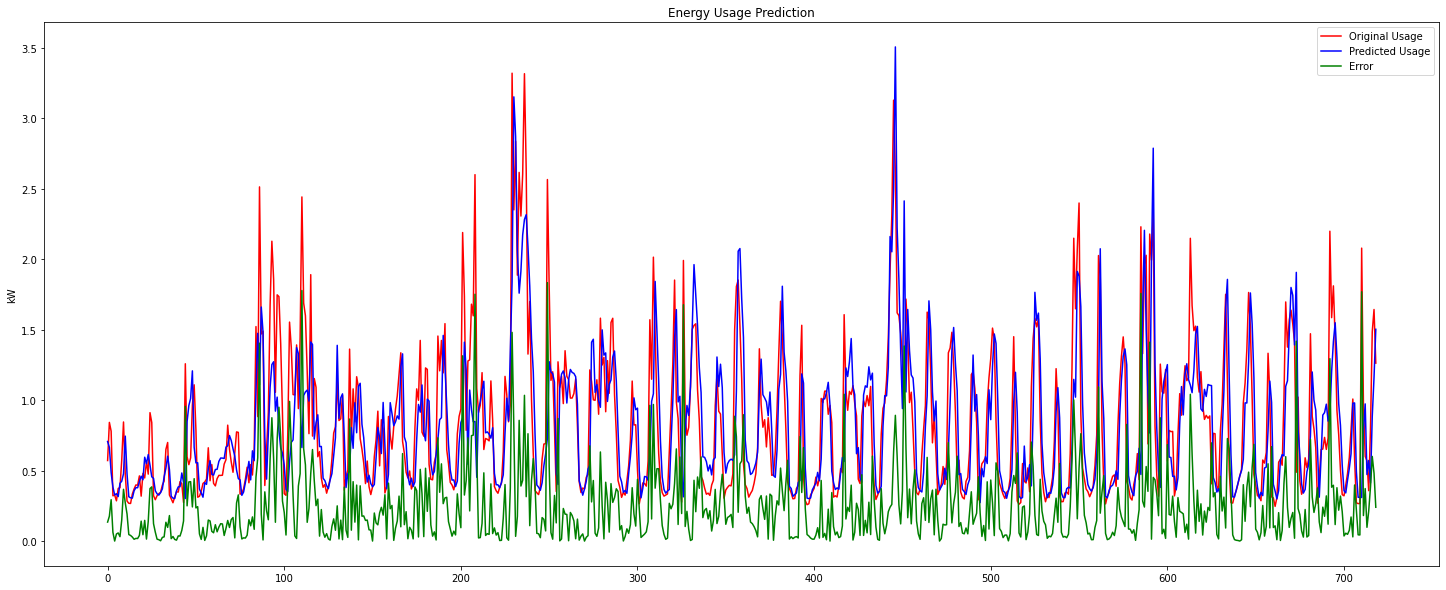

Mean Absolute Percentage Error:  0.30571629674790635
Mean Absolute Error:  0.25043924390230876
Max Absolute Error:  1.834330870123987
Mean Squared Error:  0.1430365826580298


In [85]:
featurelist = list(df.columns)
TARGET_NAME = 'use'
past_window = 1
result = make_lstm(df, featurelist, TARGET_NAME, past_window, showplots=True)  

KeyboardInterrupt: 

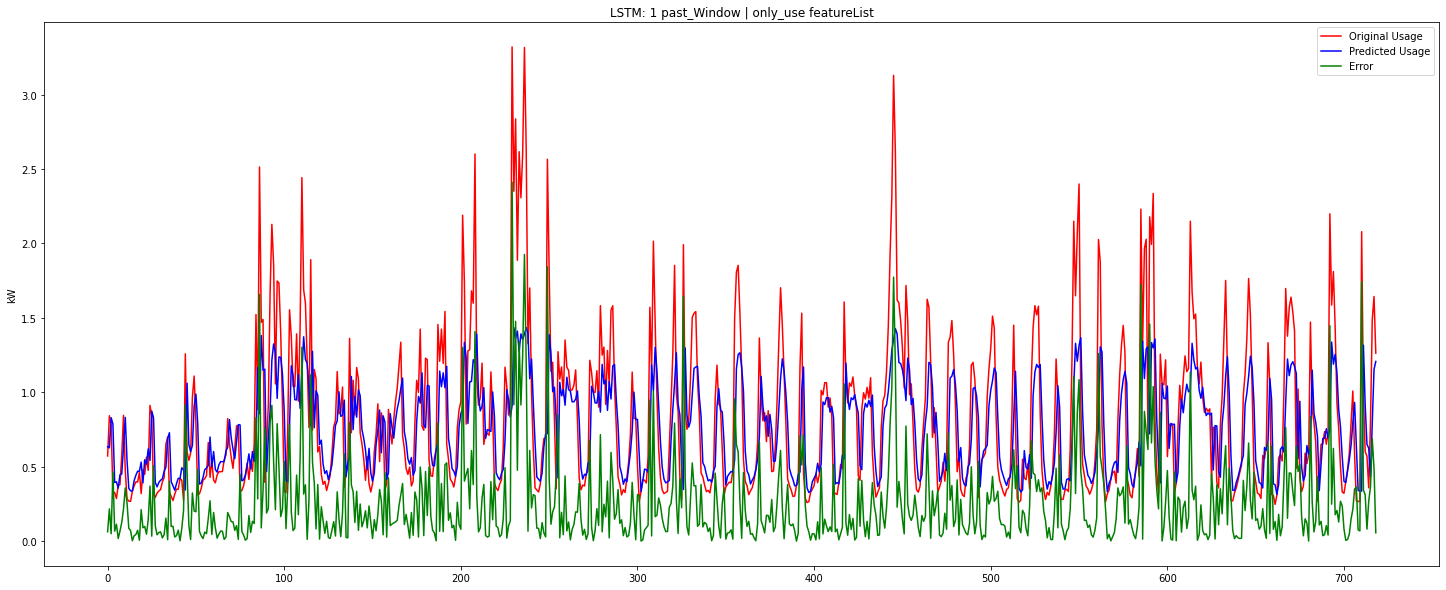

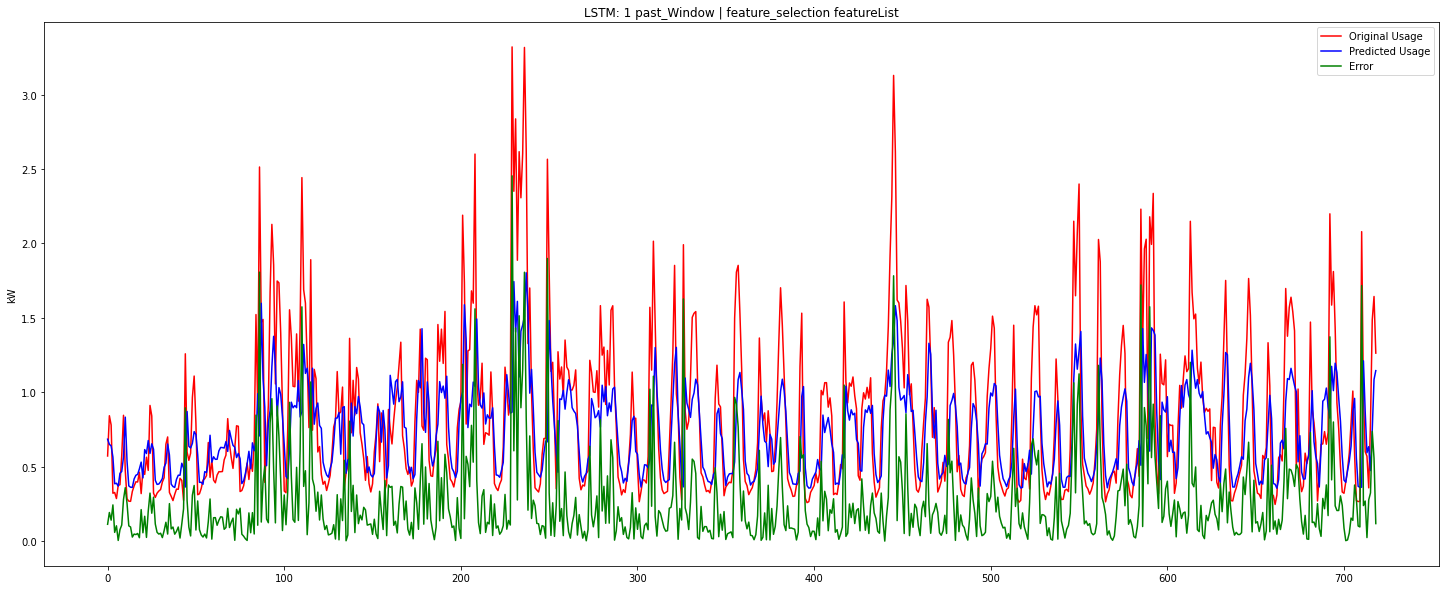

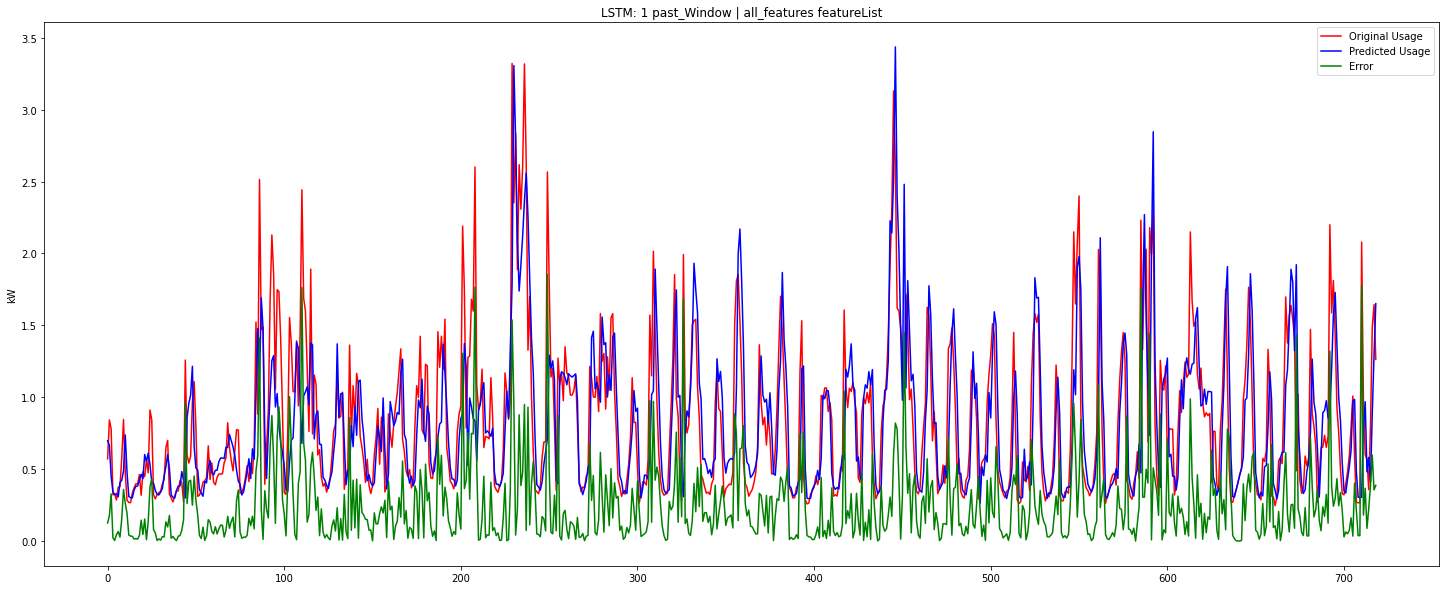

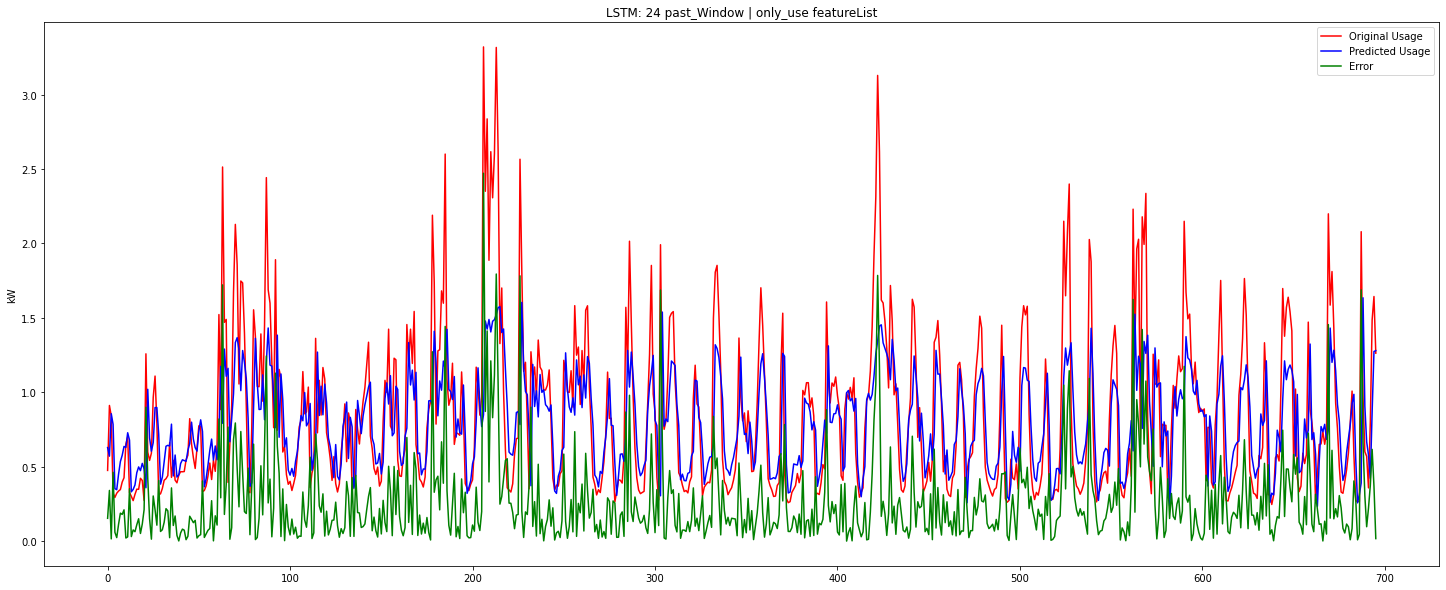

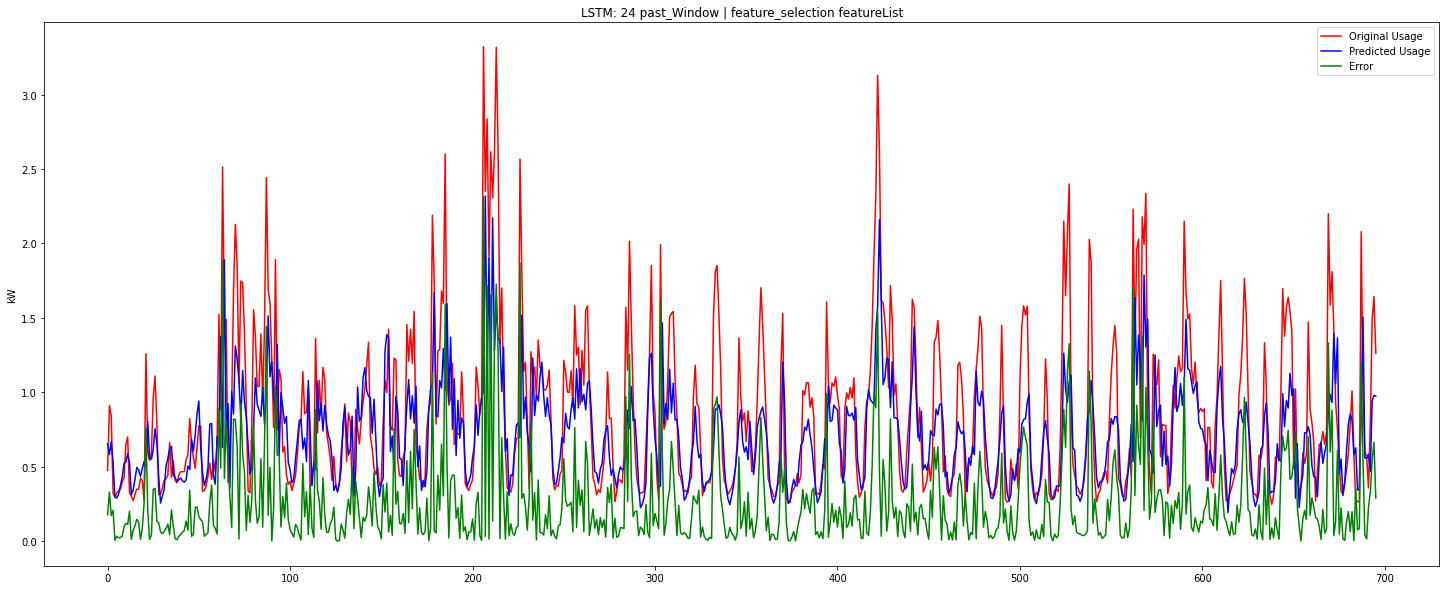

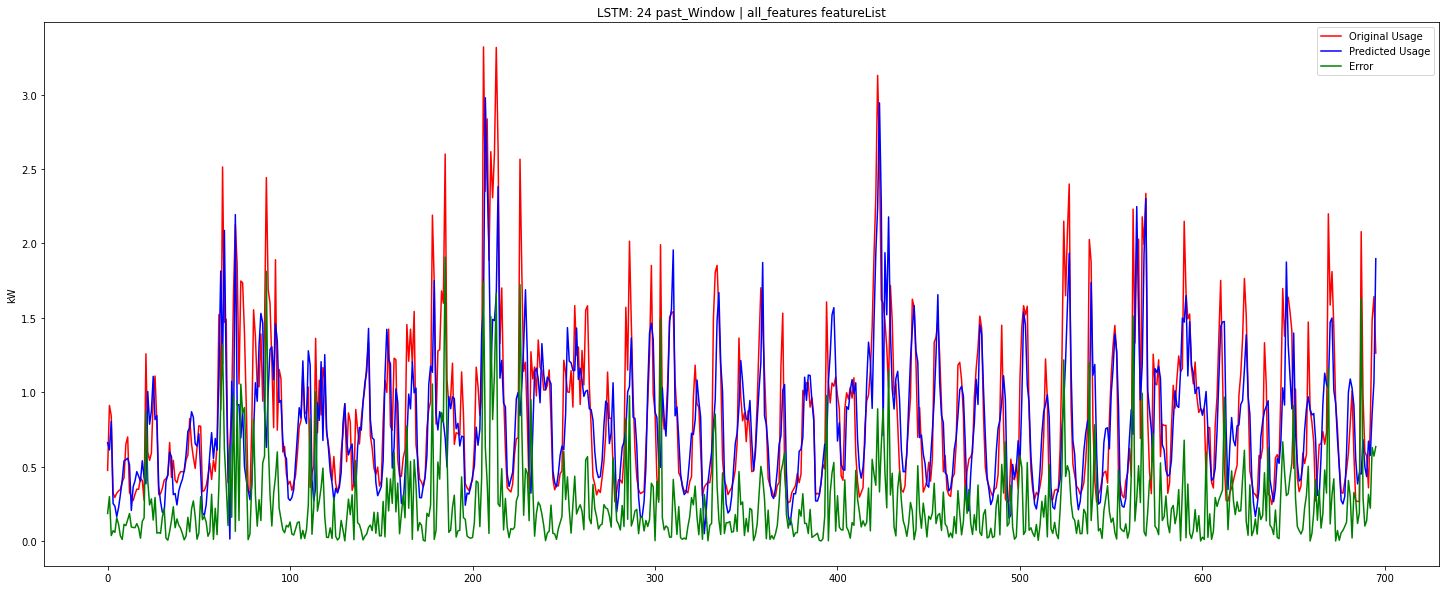

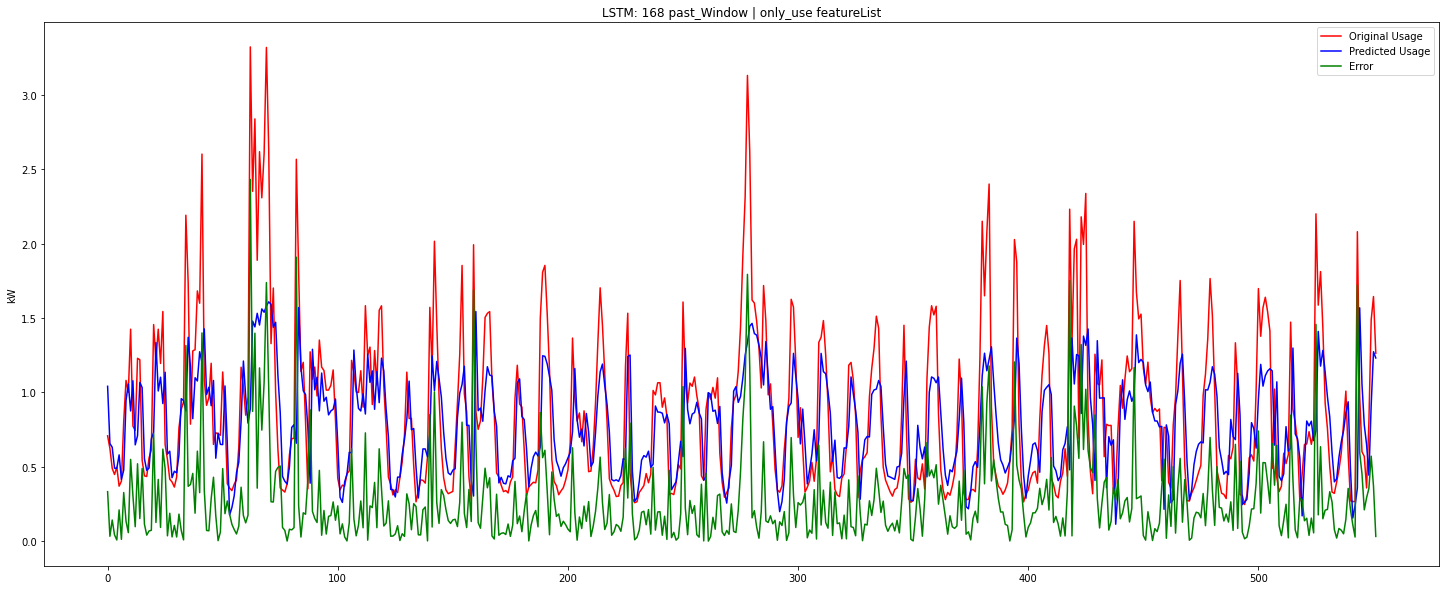

In [86]:
TARGET_NAME = "use"
PAST_WINDOWS = [1, 24, 24*7]
FEATURE_NAMES = {"only_use": ["use"],
                 "feature_selection":feature_selection,
                 "all_features":list(df.columns)}

results = []

for past_window in PAST_WINDOWS:
    for featuresName, featurelist in FEATURE_NAMES.items():
        
        name = "LSTM: " + str(past_window) + " past_Window | " + featuresName + " featureList"
        result = make_lstm(df, featurelist, TARGET_NAME, past_window, name)     
        
        results.append(result)

In [87]:
from prettytable import PrettyTable

results.sort(key=lambda x: x['mape'])
t = PrettyTable(['Name', 'mape', 'mae', 'maxae', 'mse'])

for r in results:
    t.add_row([r['name'], round(r['mape'], 3), round(r['mae'], 3), round(r['maxae'], 3), round(r['mse'], 3)])

print(t)


+------------------------------------------------------+-------+-------+-------+-------+
|                         Name                         |  mape |  mae  | maxae |  mse  |
+------------------------------------------------------+-------+-------+-------+-------+
| LSTM: 24 past_Window | feature_selection featureList | 0.278 | 0.261 | 2.314 | 0.167 |
|    LSTM: 1 past_Window | all_features featureList    | 0.299 | 0.249 | 1.854 | 0.144 |
| LSTM: 1 past_Window | feature_selection featureList  | 0.299 | 0.261 | 2.454 | 0.164 |
|   LSTM: 24 past_Window | all_features featureList    |  0.31 | 0.247 | 1.908 |  0.14 |
|      LSTM: 1 past_Window | only_use featureList      | 0.316 | 0.259 | 2.412 | 0.163 |
|     LSTM: 24 past_Window | only_use featureList      | 0.325 | 0.262 | 2.472 | 0.158 |
|     LSTM: 168 past_Window | only_use featureList     | 0.332 | 0.277 | 2.431 | 0.174 |
+------------------------------------------------------+-------+-------+-------+-------+


# SVR

In [ ]:
from sklearn.svm import SVR

def make_svr(df, featuresNames, targetName, past_window, svr_kernel, checkParams=False,name='Energy Usage Prediction', showplots=False):
    num_features = len(featuresNames)
    
    #SEPARATE INTO TRAIN / TEST
    features = df[featuresNames]
    target = df[targetName]
    x_train, x_test, y_train, y_test = train_test_split(features.values,target.values.reshape(-1, 1), test_size=24*30, shuffle=False)
    y_test_UnScalled = y_test[past_window:]
    
    #SCALE
    x_train, y_train, x_test, x_scaler, y_scaler = scale(StandardScaler, x_train, y_train, x_test)
    
    #TIME SERIES FORMAT
    batch_size=1
    train_generator = TimeseriesGenerator(x_train, y_train, length=past_window, batch_size=batch_size)
    test_generator = TimeseriesGenerator(x_test, y_test, length=past_window, batch_size=batch_size)
    svr_x_Train = [arr[0].flatten() for arr in train_generator]
    svr_y_Train = [arr[1].flatten() for arr in train_generator]
    svr_x_Test = [arr[0].flatten() for arr in test_generator]
    
    #TRAIN
    regressor = SVR(kernel = svr_kernel)  
    if checkParams:
        params = {"C":[0.1, 1, 10], "gamma": [0.1, 0.01, 0.001]}
        regressor = GridSearchCV(regressor, params)
        regressor.fit(svr_x_Train, svr_y_Train)
        print(regressor.best_params_)
    else:
        regressor.fit(svr_x_Train, svr_y_Train)
    
    #PREDICT
    return predict_evaluate(regressor, svr_x_Test, y_scaler, y_test_UnScalled, graphName=name, showplots=showplots)
    

## Evaluate a bunch of SVRs

In [ ]:
TARGET_NAME = "use"
PAST_WINDOWS = [1, 24, 7*24]
FEATURE_NAMES = {"only_use": ["use"],
                 "feature_selection":feature_selection}  #TODAS AS FEATURES DEMORA MUITO TEMPO
KERNELS = ["linear","rbf"]

resultsSVR = []
for kernel in KERNELS:
    for past_window in PAST_WINDOWS:
        for featuresName, featurelist in FEATURE_NAMES.items():
            if past_window == 24*7 and featuresName != "only_use": #DEMORA DEMASIADO TEMPO
                continue
            
            t1= time.time()
            name = "SVR: " + kernel + " | " + str(past_window) + " past_Window | " + featuresName + " featureList"
            result = make_svr(df, featurelist, TARGET_NAME, past_window, kernel,name=name)     
            result['time']=time.time()-t1
            
            resultsSVR.append(result)


In [ ]:
from prettytable import PrettyTable

resultsSVR.sort(key=lambda x: x['mape'])
t = PrettyTable(['Name', 'mape', 'mae', 'maxae', 'mse'])

for r in resultsSVR:
    t.add_row([r['name'], round(r['mape'], 3), round(r['mae'], 3), round(r['maxae'], 3), round(r['mse'], 3)])

print(t)

1 semana de past window foi avaliada apenas com informação do uso porque com mais features demora demasiado tempo.  
Melhor SVR tem 24 horas de past window e apenas usa o consumo energético. Este modelo é melhor que a melhor LSTM

# ARIMA

ARIMA não foi testado a fundo nem com uma dimenção de teste tão grande como nos outros algoritmos porque demora muito tempo e numa fase inicial mostrou ter resultados piores

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

train = [x for x in df["use"][:-300].values]
test = [x for x in df["use"][-300:].values]

prediction = list()
for t in range(len(test)):
    model = ARIMA(train, order=(5,1,0))
    model = model.fit()
    pred = model.forecast()[0]

    prediction.append(pred)
    train.append(test[t])
    print('progress:%',round(100*(t/len(test))), end="\r")


In [ ]:
diff = [abs(prediction[i]-test[i]) for i in range(len(prediction))]

plt.figure(figsize=(25,10))
plt.plot(test, color='red', label='Original Usage')
plt.plot(prediction, color='blue', label='Predicted Usage')
plt.plot(diff, color='green', label='Error')
plt.title("ARIMA")
plt.ylabel('kW')
plt.legend()
plt.show

mape = mean_absolute_percentage_error(test, prediction)
mae = mean_absolute_error(test, prediction)
maxae = max(diff)
mse = mean_squared_error(test, prediction)
print("Mean Absolute Percentage Error: ", mape)
print("Mean Absolute Error: ", mae)
print("Max Absolute Error: ", maxae)
print("Mean Squared Error: ", mse)